In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from sklearn.preprocessing import MinMaxScaler

In [2]:
np.version.version

'1.19.5'

In [3]:
PORTFOLIO = 'BTC-USD'
start = '2015-01-01'
end = '2021-09-1'

In [4]:
dataset = pd.DataFrame(yf.download(PORTFOLIO, start=start, end=end).ffill().dropna())

[*********************100%***********************]  1 of 1 completed


In [5]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
...,...,...,...,...,...,...
2021-08-27,46894.554688,49112.785156,46394.281250,49058.667969,49058.667969,34511076995
2021-08-28,49072.585938,49283.503906,48499.238281,48902.402344,48902.402344,28568103401
2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,25889650240


In [6]:
dataset['Date'] = dataset.index

In [7]:
dataset.reset_index(drop=True, inplace=True)

In [8]:
dataset

,Open,High,Low,Close,Adj Close,Volume,Date
0,310.914001,320.192993,310.210999,320.192993,320.192993,13942900,2014-12-31
1,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2015-01-01
2,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2015-01-02
3,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,2015-01-03
4,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,2015-01-04
...,...,...,...,...,...,...,...
2427,46894.554688,49112.785156,46394.281250,49058.667969,49058.667969,34511076995,2021-08-27
2428,49072.585938,49283.503906,48499.238281,48902.402344,48902.402344,28568103401,2021-08-28
2429,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,25889650240,2021-08-29
2430,48834.851562,48925.605469,46950.273438,47054.984375,47054.984375,31847007016,2021-08-30


In [9]:
data_training = dataset[dataset['Date']< '2021-04-01'].copy()

In [10]:
data_training

,Open,High,Low,Close,Adj Close,Volume,Date
0,310.914001,320.192993,310.210999,320.192993,320.192993,13942900,2014-12-31
1,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2015-01-01
2,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2015-01-02
3,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,2015-01-03
4,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,2015-01-04
...,...,...,...,...,...,...,...
2274,55137.566406,56568.214844,54242.910156,55973.511719,55973.511719,47266542233,2021-03-27
2275,55974.941406,56610.312500,55071.113281,55950.746094,55950.746094,47686580918,2021-03-28
2276,55947.898438,58342.097656,55139.339844,57750.199219,57750.199219,57625587027,2021-03-29
2277,57750.132812,59447.222656,57251.550781,58917.691406,58917.691406,54414116432,2021-03-30


In [11]:
data_test = dataset[dataset['Date'] > '2021-03-31'].copy()

In [12]:
data_test

,Open,High,Low,Close,Adj Close,Volume,Date
2279,58926.562500,59586.070312,58505.277344,59095.808594,59095.808594,61669163792,2021-04-01
2280,59098.878906,60267.187500,58869.281250,59384.312500,59384.312500,58727860620,2021-04-02
2281,59397.410156,60110.269531,57603.890625,57603.890625,57603.890625,59641344484,2021-04-03
2282,57604.839844,58913.746094,57168.675781,58758.554688,58758.554688,50749662970,2021-04-04
2283,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115,2021-04-05
...,...,...,...,...,...,...,...
2427,46894.554688,49112.785156,46394.281250,49058.667969,49058.667969,34511076995,2021-08-27
2428,49072.585938,49283.503906,48499.238281,48902.402344,48902.402344,28568103401,2021-08-28
2429,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,25889650240,2021-08-29
2430,48834.851562,48925.605469,46950.273438,47054.984375,47054.984375,31847007016,2021-08-30


In [13]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,310.914001,320.192993,310.210999,320.192993,13942900
1,320.434998,320.434998,314.002991,314.248993,8036550
2,314.079010,315.838989,313.565002,315.032013,7860650
3,314.846008,315.149994,281.082001,281.082001,33054400
4,281.145996,287.230011,257.612000,264.195007,55629100


In [14]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[2.19540791e-03, 1.76440911e-03, 2.34566400e-03, 2.32686541e-03,
        1.73303186e-05],
       [2.35137671e-03, 1.76834593e-03, 2.40979288e-03, 2.22952647e-03,
        5.01196602e-07],
       [2.24725570e-03, 1.69358021e-03, 2.40238577e-03, 2.24234921e-03,
        0.00000000e+00],
       ...,
       [9.13616178e-01, 9.45637714e-01, 9.29597162e-01, 9.42800496e-01,
        1.64171738e-01],
       [9.43139595e-01, 9.63615373e-01, 9.65318152e-01, 9.61919345e-01,
        1.55021208e-01],
       [9.62472207e-01, 9.71469414e-01, 9.73348944e-01, 9.61938024e-01,
        1.86667855e-01]])

In [15]:
X_train = [] 
Y_train = []

In [16]:
training_data.shape

(2279, 5)

In [17]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
   
        

In [18]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(2219, 60, 5)

In [19]:
Y_train

array([0.0012677 , 0.00136721, 0.00160783, ..., 0.91361618, 0.94313959,
       0.96247221])

In [20]:
from tensorflow.keras import Sequential

In [21]:
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [22]:
model = Sequential() 



In [23]:
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1))
model.summary()

2021-11-29 19:34:22.814249: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-29 19:34:22.814574: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
history= model.fit(X_train, Y_train, epochs = 25, batch_size = 64, validation_split=0.1)

Train on 1997 samples, validate on 222 samples
Epoch 1/25
1997/1997 [==============================] - 27s 13ms/sample - loss: 0.0026 - val_loss: 0.0087
Epoch 2/25
1997/1997 [==============================] - 19s 9ms/sample - loss: 6.0035e-04 - val_loss: 0.0169
Epoch 3/25
1997/1997 [==============================] - 19s 10ms/sample - loss: 6.1052e-04 - val_loss: 0.0256
Epoch 4/25
1997/1997 [==============================] - 21s 10ms/sample - loss: 5.4639e-04 - val_loss: 0.0242
Epoch 5/25
1997/1997 [==============================] - 21s 10ms/sample - loss: 5.3801e-04 - val_loss: 0.0300
Epoch 6/25
1997/1997 [==============================] - 24s 12ms/sample - loss: 4.7434e-04 - val_loss: 0.0314
Epoch 7/25
1997/1997 [==============================] - 25s 12ms/sample - loss: 3.9138e-04 - val_loss: 0.0529
Epoch 8/25
1997/1997 [==============================] - 23s 12ms/sample - loss: 4.5496e-04 - val_loss: 0.0243
Epoch 9/25
1997/1997 [==============================] - 36s 18ms/sample - loss

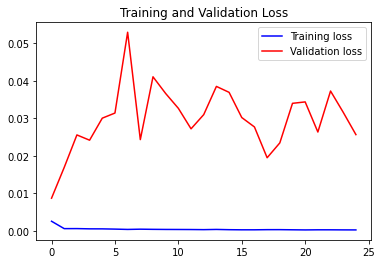

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [27]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,34270.878906,34288.332031,32270.175781,33114.359375,52754542671
1,33114.578125,34638.214844,32384.228516,33537.175781,61400400660
2,33533.199219,35896.882812,33489.218750,35510.289062,63088585433
3,35510.820312,37480.187500,35443.984375,37472.089844,61166818159
4,37475.105469,38592.175781,36317.500000,36926.066406,68838074392


In [28]:
inputs = scaler.transform(df)
inputs

array([[0.55851272, 0.55434226, 0.54284167, 0.53936405, 0.15029254],
       [0.5395707 , 0.560034  , 0.54477049, 0.54628809, 0.17492742],
       [0.54642837, 0.58050942, 0.56345771, 0.57859979, 0.17973761],
       ...,
       [0.79834488, 0.80414296, 0.80760518, 0.79672059, 0.07374568],
       [0.79709335, 0.79245461, 0.79110647, 0.76765569, 0.09072014],
       [0.76743434, 0.78048081, 0.7877211 , 0.76948494, 0.09893576]])

In [29]:
X_test = []
Y_test = []

In [30]:
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])  
    Y_test.append(inputs[i, 0])



In [31]:
X_test, Y_test = np.array(X_test), np.array(Y_test)


In [32]:
Y_pred = model.predict(X_test)

In [33]:
scaler.scale_

array([1.63815631e-05, 1.62675340e-05, 1.69116584e-05, 1.63759974e-05,
       2.84932690e-12])

In [34]:
scale = 1/1.63815631e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
Y_pred

array([[35084.125],
       [35883.605],
       [36711.375],
       [37415.355],
       [37898.633],
       [38163.363],
       [38226.86 ],
       [38071.85 ],
       [37751.32 ],
       [37378.324],
       [37068.082],
       [36901.473],
       [36901.418],
       [37103.973],
       [37510.758],
       [38040.688],
       [38544.87 ],
       [38886.387],
       [38878.516],
       [38476.42 ],
       [37766.414],
       [36869.098],
       [35857.06 ],
       [34779.387],
       [33710.07 ],
       [32710.426],
       [31934.117],
       [31554.512],
       [31659.533],
       [32164.832],
       [32994.277],
       [34086.91 ],
       [35277.812],
       [36408.65 ],
       [37252.402],
       [37734.617],
       [37915.035],
       [37871.883],
       [37728.04 ],
       [37556.266],
       [37336.41 ],
       [37052.047],
       [36597.68 ],
       [35889.477],
       [34985.59 ],
       [33951.41 ],
       [32851.43 ],
       [31726.678],
       [30626.473],
       [29482.824],


In [35]:
Y_test

array([58749.66544972, 58921.98185584, 59220.5131056 , 57427.94279453,
       58583.97794986, 58995.03654328, 58009.61076282, 55923.01701449,
       58149.6654502 , 58076.88029401, 59669.33341774, 59999.04826122,
       59713.1224802 , 63346.85685229, 62898.2982589 , 63081.6068525 ,
       61353.02482264, 60524.98966705, 56014.68888942, 55504.89592107,
       56294.23185794, 53680.20842254, 51562.91154924, 50966.32951846,
       49875.93498809, 48900.89592637, 53853.40764115, 54859.73967159,
       54681.19279674, 53391.76701652, 57537.76701319, 57648.96623186,
       56443.37638907, 57037.2826386 , 53075.26701677, 57264.41154466,
       56237.05607674, 57175.86857599, 58700.49357476, 58073.97404401,
       55670.34513969, 56537.6342015 , 49558.53655084, 49506.08342588,
       49678.59905075, 46539.73967826, 46239.00139725, 43311.16155585,
       42768.07952504, 36576.77093625, 40420.05218317, 37194.13421701,
       37354.55218563, 34523.4662504 , 38618.88421586, 38215.72796619,
      

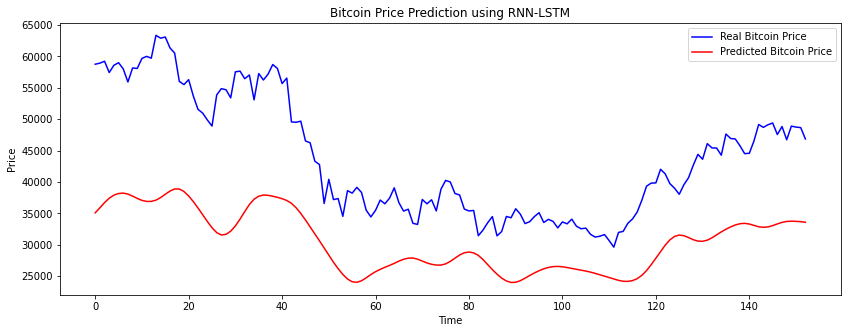

In [36]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'blue', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'red', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [42]:
Y_pred.shape

(153, 1)

In [47]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(Y_test, Y_pred)
errors

13210.961813326845